In [1]:
import os
import sys

In [2]:
sys.path.insert(0, '/Users/marusy/Programming/another-fem-framework/')
#sys.path.insert(0, '/home/lshtanko/Programming/another-fem-framework/')
#sys.path.insert(0, '/Users/leonshting/Programming/Schlumberger/fem-framework/')

In [3]:
import numpy as np
from interpolant.cell_to_points import Cell2PointsConverter
from interpolant.strict import StrictSolve
from interpolant.opt import OptSolve
from common.helpers import *
from interpolant.helpers import *
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
np.set_printoptions(linewidth=500, precision=3)

In [5]:
c2p = Cell2PointsConverter(orders=[[3],[3,3]])

In [10]:
strict_solve = StrictSolve(points=c2p.get_points(), weights=c2p.get_diag_weights(), verbose=True)

In [52]:
c2p.get_points()

[array([ 0.        ,  0.17267317,  0.5       ,  0.82732683,  1.        ]),
 array([ 0.        ,  0.08633658,  0.25      ,  0.41366342,  0.5       ,  0.58633661,  0.75      ,  0.91366339,  1.        ])]

In [11]:
strict_solve.fit_strict(max_power=strict_solve.get_max_pow(unrisky=True), method='sympy')

Number of equations: 28
Number of degrees of freedom: 45
Strictly stitched_power: 1
Start solving strict part
End solving strict part
NullspaceRank: 17


In [49]:
interps = strict_solve.get_interpolants()
wgths = strict_solve.get_weight_matrices()

In [50]:
opt_solve = OptSolve(matrices=interps,
                     points=c2p.get_points(),
                     strict_power=strict_solve.get_max_pow(unrisky=True),
                     weights_matrices=wgths,
                     verbose=True
                    )

In [48]:
opt_solve.fit_opt(constraints=True, tr_fun_option='chebyshev', orders_forwards=2)

Results are saved, get your interploants in I_rl and I_lr fields or restart with higher tolerance


In [ ]:
opt_solve.restart_opt(tolerance=1e-3)

In [51]:
I_rl = np.array(opt_solve.I_rl_subbed).astype(np.float64)
I_lr = np.array(opt_solve.I_lr_subbed).astype(np.float64)

AttributeError: 'OptSolve' object has no attribute 'I_rl_subbed'

In [19]:
tr_f = np.vectorize(lambda x: (x-0.5)*x*(x-1))

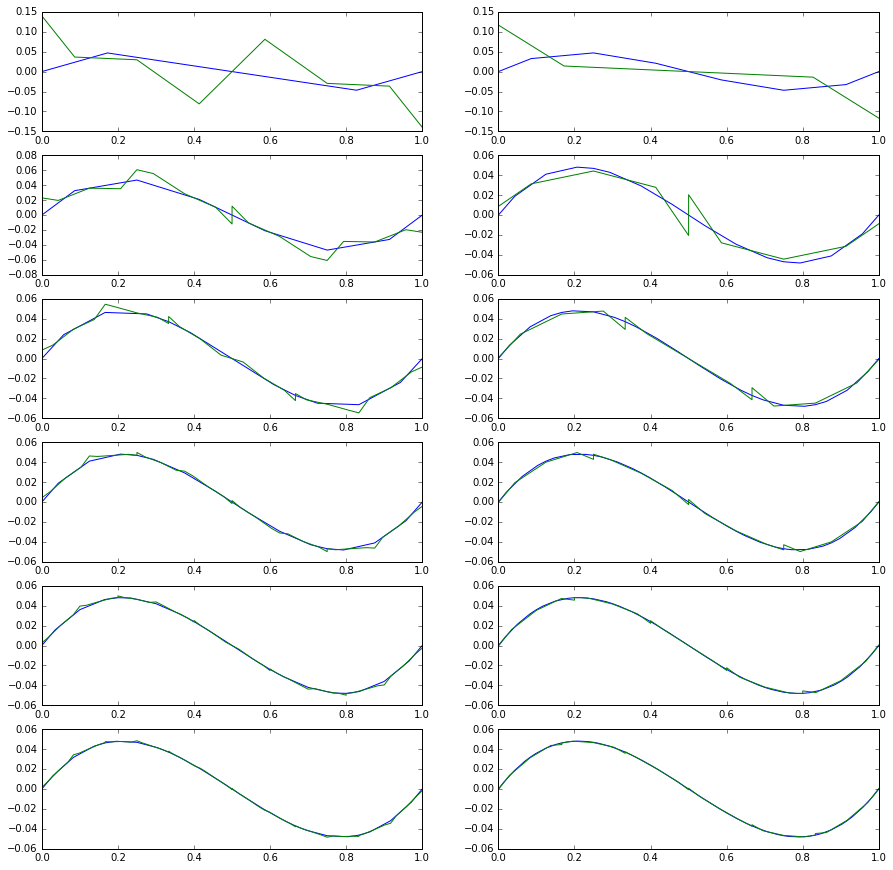

In [22]:
eps_l, eps_r = convergence_test(I_lr=new_int1,
                                I_rl=new_int2,
                                p_l=opt_solve.points[0],
                                p_r=opt_solve.points[1],
                                init_size=(0,1),
                                tr_f=tr_f,
                                weights=[np.array(strict_solve.W_l), np.array(strict_solve.W_r)],
                                div_lim=7)

In [ ]:
explosion_test(I_lr=I_lr,
               I_rl=I_rl,
               p_l=opt_solve.points[0],
               p_r=opt_solve.points[1],
               tr_f=tr_f,
               reps=3)

In [ ]:
plt.semilogy(range(len(eps_l)), eps_l)
plt.semilogy(range(len(eps_r)), eps_r)
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-np.linspace(0, len(eps_r))))
plt.semilogy(np.linspace(0, len(eps_r)), float(eps_r[0])*np.exp(-2*np.linspace(0, len(eps_r))))

In [ ]:
np.linalg.eigvals(np.dot(new_int1, new_int2))

In [ ]:
np.linalg.eigvals(np.dot(I_lr, I_rl))

In [20]:
new_int1 = (I_lr + I_lr[::-1,::-1])/2

In [21]:
new_int2 = (I_rl + I_rl[::-1, ::-1])/2

In [ ]:
c2p.get_weights()[0]

In [ ]:
np.dot(I_rl, c2p.get_weights()[1]).sum()

In [ ]:
np.dot(np.dot(c2p.get_diag_weights()[1], new_int1), np.linalg.inv(c2p.get_diag_weights()[0])).T

In [23]:
new_int2

array([[-0.20535304,  1.22590946,  0.10525083,  1.64112193, -0.29064655, -1.91597868, -0.19796772,  0.36454667,  0.27311299],
       [ 0.2171585 ,  0.25056366,  0.4634395 , -0.35561032,  0.06120642,  0.51049938,  0.04974519, -0.13964233, -0.05736224],
       [-0.06156647,  0.07422826,  0.12013121,  0.30288334,  0.12863748,  0.30288334,  0.12013121,  0.07422826, -0.06156647],
       [-0.05736224, -0.13964233,  0.04974519,  0.51049938,  0.06120642, -0.35561032,  0.4634395 ,  0.25056366,  0.2171585 ],
       [ 0.27311299,  0.36454667, -0.19796772, -1.91597868, -0.29064655,  1.64112193,  0.10525083,  1.22590946, -0.20535304]])

In [ ]:
new_int2= np.array([[ 0.47913998,  0.6452334 , -0.21919967,  0.02834773,  0.39265603,
        -0.39775608,  0.07157862],
       [ 0.03097077,  0.37368352,  0.51547025,  0.09433045, -0.05016152,
         0.07682102, -0.04111448],
       [-0.04111448,  0.07682102, -0.05016152,  0.09433045,  0.51547025,
         0.37368352,  0.03097077],
       [ 0.07157862, -0.39775608,  0.39265603,  0.02834773, -0.21919967,
         0.6452334 ,  0.47913998]])

In [ ]:
new_int1 = np.array([[ 0.95827995,  0.30970766, -0.41114484,  0.14315723],
       [ 0.25809336,  0.74736704,  0.15364203, -0.15910243],
       [-0.08767987,  1.03094049, -0.10032303,  0.15706241],
       [ 0.02834773,  0.47165227,  0.47165227,  0.02834773],
       [ 0.15706241, -0.10032303,  1.03094049, -0.08767987],
       [-0.15910243,  0.15364203,  0.74736704,  0.25809336],
       [ 0.14315723, -0.41114484,  0.30970766,  0.95827995]])

In [ ]:
new_int1

In [ ]:
new_int2

In [ ]:
new_int1 = np.array([[ 1.   ,  0.   ,  0.   ],
       [ 0.375,  0.75 , -0.125],
       [ 0.   ,  1.   ,  0.   ],
       [-0.125,  0.75 ,  0.375],
       [ 0.   ,  0.   ,  1.   ]])



In [ ]:
new_int2 = np.dot(np.dot(c2p.get_diag_weights()[1], new_int1), np.linalg.inv(c2p.get_diag_weights()[0])).T

In [ ]:
new_int1

In [ ]:
new_int2

In [ ]:
new_int1 = normalize((new_int1 + new_int2.T)/2)

In [ ]:
def normalize(v):
    norm=np.linalg.norm(v, ord=1, axis=-1)
    return (v.T/norm).T

In [24]:
from common.polynom_factory import polynom_factory

def get_href_constrain_matrix(order, inversed=False, distribution='uniform'):
    glob_func_on_loc_mesh = np.zeros((order+1, order+1))
    funcs_prim, glob_grid = polynom_factory(dim=1, order=order,size=(0,2), distribution=distribution)
    funcs, local_grid = polynom_factory(dim=1, order=order,size=(0,1), distribution=distribution)
    for num1, i in enumerate(local_grid):
        for num2, prim_f in enumerate(funcs_prim):
            glob_func_on_loc_mesh[num1, num2] = prim_f.subs({'x_1':i[0]})
    if(inversed):
        return np.linalg.inv(glob_func_on_loc_mesh)
    else:
        return glob_func_on_loc_mesh

In [45]:
a =get_href_constrain_matrix(distribution='globatto', order=4)
b = np.vstack((a, a[1:][::-1,::-1]))

In [43]:
a[1:][::-1, ::-1]

array([[  3.38507843e-01,   7.89851638e-01,  -1.88401872e-01,   9.20296742e-02,  -3.19872831e-02],
       [ -1.17187497e-01,   8.84031716e-01,   3.12499997e-01,  -1.18406715e-01,   3.90624991e-02],
       [ -7.06507002e-02,   2.82970329e-01,   9.02687581e-01,  -1.64851635e-01,   4.98444254e-02],
       [ -8.88178420e-16,  -3.99680289e-15,   1.00000000e+00,   8.88178420e-16,  -4.44089210e-16]])

In [44]:
a[1:][::-1, ::-1]

array([[ -4.44089210e-16,   8.88178420e-16,   1.00000000e+00,  -3.99680289e-15,  -8.88178420e-16],
       [  4.98444254e-02,  -1.64851635e-01,   9.02687581e-01,   2.82970329e-01,  -7.06507002e-02],
       [  3.90624991e-02,  -1.18406715e-01,   3.12499997e-01,   8.84031716e-01,  -1.17187497e-01],
       [ -3.19872831e-02,   9.20296742e-02,  -1.88401872e-01,   7.89851638e-01,   3.38507843e-01]])

In [46]:
b

array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.38507843e-01,   7.89851638e-01,  -1.88401872e-01,   9.20296742e-02,  -3.19872831e-02],
       [ -1.17187497e-01,   8.84031716e-01,   3.12499997e-01,  -1.18406715e-01,   3.90624991e-02],
       [ -7.06507002e-02,   2.82970329e-01,   9.02687581e-01,  -1.64851635e-01,   4.98444254e-02],
       [ -8.88178420e-16,  -3.99680289e-15,   1.00000000e+00,   8.88178420e-16,  -4.44089210e-16],
       [ -4.44089210e-16,   8.88178420e-16,   1.00000000e+00,  -3.99680289e-15,  -8.88178420e-16],
       [  4.98444254e-02,  -1.64851635e-01,   9.02687581e-01,   2.82970329e-01,  -7.06507002e-02],
       [  3.90624991e-02,  -1.18406715e-01,   3.12499997e-01,   8.84031716e-01,  -1.17187497e-01],
       [ -3.19872831e-02,   9.20296742e-02,  -1.88401872e-01,   7.89851638e-01,   3.38507843e-01]])

In [7]:
c2p.get_weights()

[array([ 0.08333334,  0.41666666,  0.41666666,  0.08333334]),
 array([ 0.04166667,  0.20833333,  0.20833333,  0.08333334,  0.20833333,  0.20833333,  0.04166667])]

In [8]:
from common import polynom_factory

array([ 0.028,  0.111,  0.028,  0.111,  0.444,  0.111,  0.028,  0.111,  0.028])